In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Ignore warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Battery_RUL.csv')

In [3]:
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [4]:
data.shape

(15064, 9)

### Exploratory Data Analysis

In [5]:
data.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

In [6]:
data[data.duplicated()]

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL


In [7]:
data.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [8]:
data.nunique()

Cycle_Index                   1124
Discharge Time (s)           10889
Decrement 3.6-3.4V (s)        5068
Max. Voltage Dischar. (V)      437
Min. Voltage Charg. (V)        757
Time at 4.15V (s)            11529
Time constant current (s)     3148
Charging time (s)            11865
RUL                           1133
dtype: int64

#### Distribution Plots

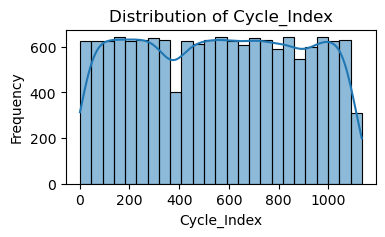

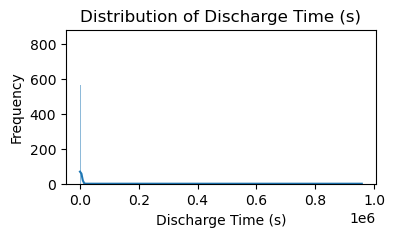

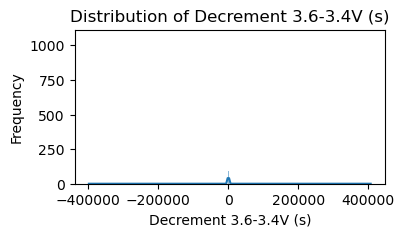

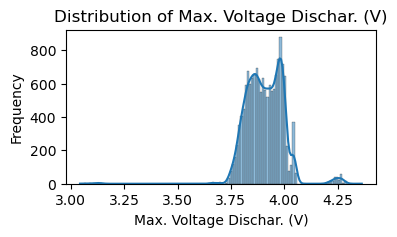

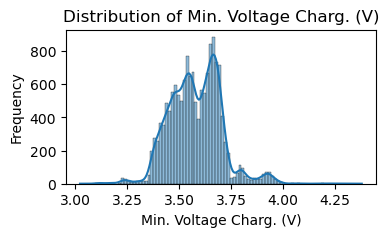

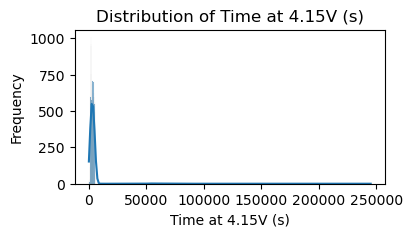

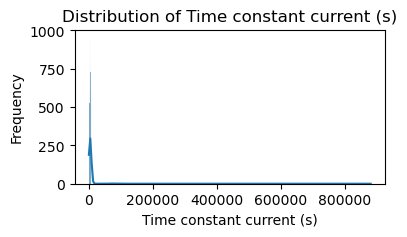

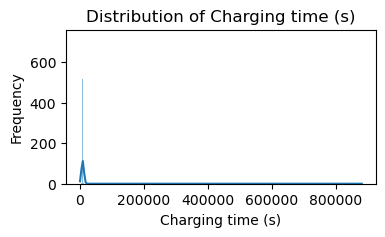

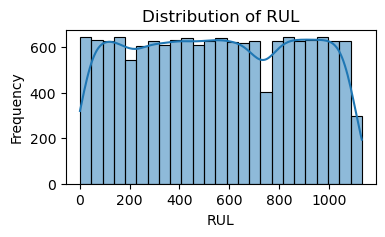

In [9]:
for column in data.columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


#### Cross-Feature Relationships (Scatter Plots)

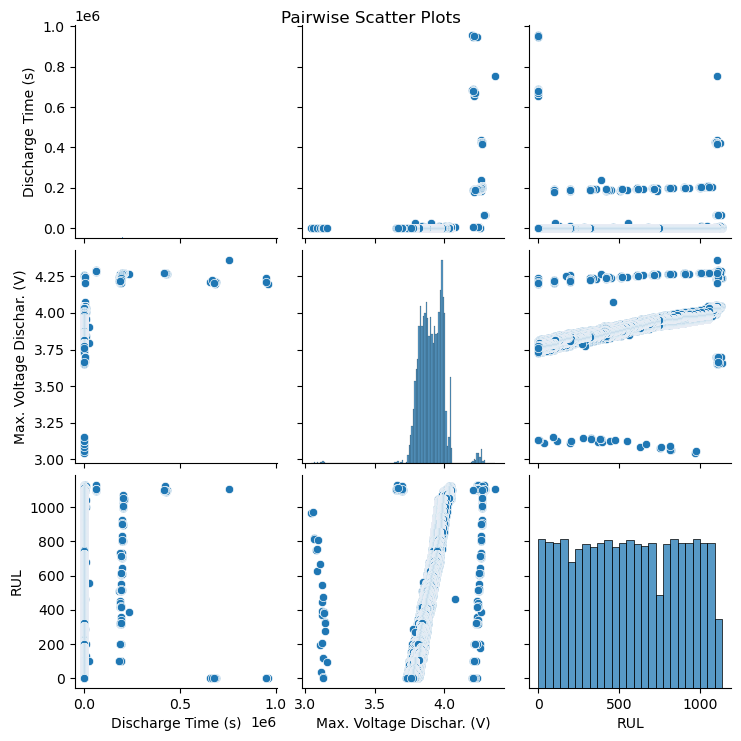

In [10]:
sns.pairplot(data, vars=['Discharge Time (s)', 'Max. Voltage Dischar. (V)', 'RUL'], kind='scatter')
plt.suptitle('Pairwise Scatter Plots')
plt.show()

#### Target Variable Analysis (RUL)

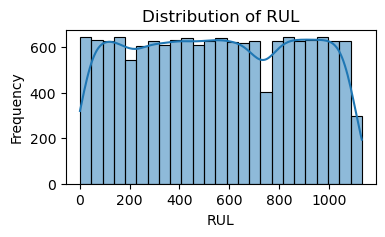

In [11]:
plt.figure(figsize=(4, 2))
sns.histplot(data['RUL'], kde=True)
plt.title('Distribution of RUL')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.show()

#### Time series Analysis

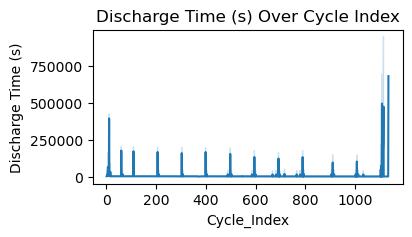

In [12]:
# Time-series plot of Discharge Time vs. Cycle_Index
plt.figure(figsize=(4, 2))
sns.lineplot(x='Cycle_Index', y='Discharge Time (s)', data=data)
plt.title('Discharge Time (s) Over Cycle Index')
plt.xlabel('Cycle_Index')
plt.ylabel('Discharge Time (s)')
plt.show()

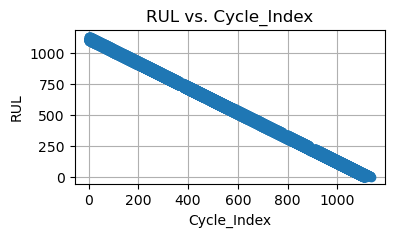

In [13]:
# Time-series plot of RUL vs. Cycle_Index
plt.figure(figsize=(4, 2))
plt.plot(data['Cycle_Index'], data['RUL'], marker='o', linestyle='-')
plt.xlabel('Cycle_Index')
plt.ylabel('RUL')
plt.title('RUL vs. Cycle_Index')
plt.grid(True)
plt.show()


#### Oullier detection

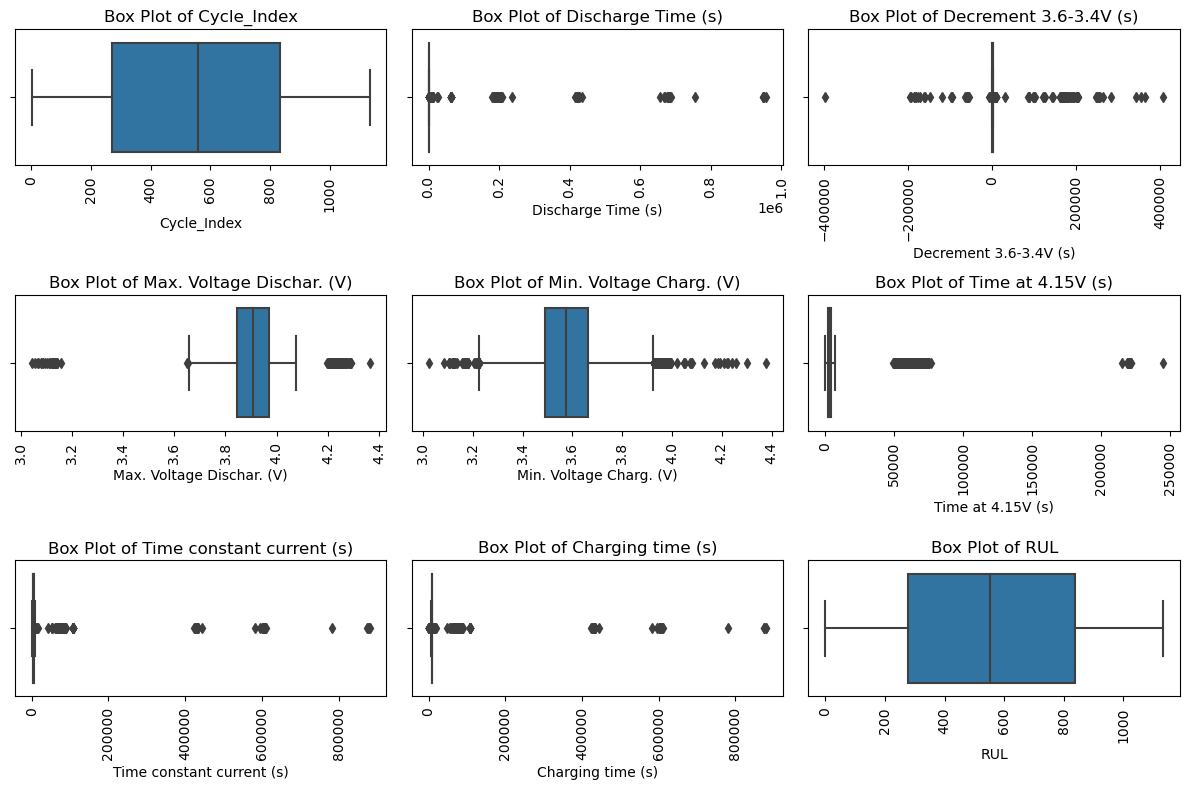

In [14]:
plt.figure(figsize=(12, 8))

# Define the number of rows and columns for subplots
num_rows = 3  
num_cols = 3

# Loop through each feature and create a subplot
for i, feature in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=data[feature], orient="v")  
    plt.title(f"Box Plot of {feature}")
    plt.xticks(rotation=90)  

plt.tight_layout()

# Show the plots
plt.show()


Outliers were detected beyond the specified limits for all features except 'Cycle_Index' and 'RUL,' and it was determined that preserving these outlier data points is essential for subsequent analysis.

#### Correlation

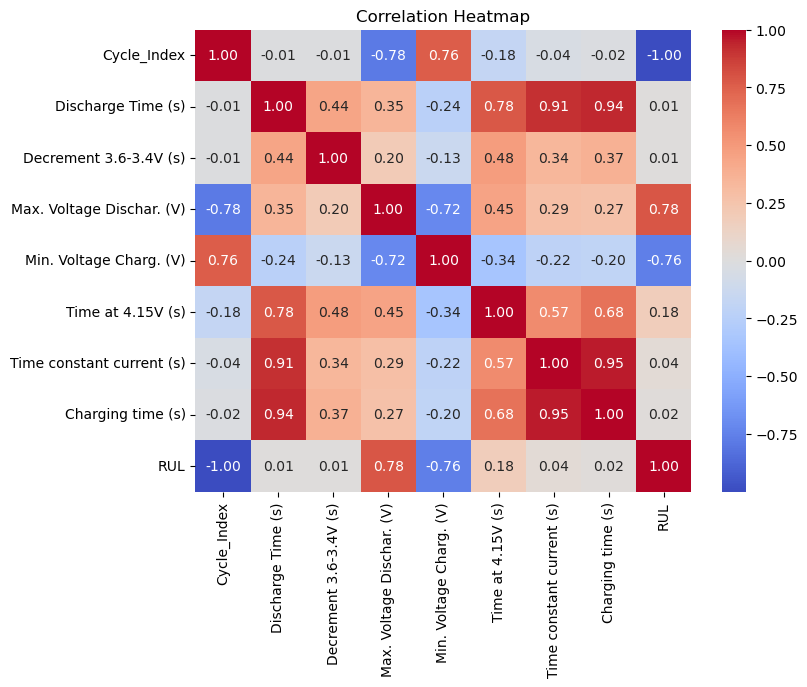

In [15]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=True, yticklabels=True)
plt.title("Correlation Heatmap")
plt.show()

Based on the correlation heatmap, we observed that the following pairs of features are highly correlated:

Discharge Time and Time constant current: These two features exhibit a strong positive correlation, suggesting that they tend to increase or decrease together during battery operation.

Discharge Time and Charging time: There is a notable positive correlation between these features.

Charging time and Time constant current: These features also display a positive correlation.

Charging time and Time constant current are being removed from the feature set due to the presence of multicollinearity, which can simplify the model while preserving potentially more important predictive features.

### Feature reduction

After examining the features, we decided to remove "Charging time (s)" and "Time constant current (s)." This simplifies the dataset and may make the model work better.